# Laboratorios Matematicas Discretas

Presentado a Jonnathan Ramos Chaux

2152015 - Carlos Andres Ochoa Camacho | 2172022 - Kevin Alonso Luna Bustos | 2172916 - Cristian Leonardo Rueda Quintanilla

# 1.1 - Representación del grafo

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import array
from priodict import priorityDictionary

d1 = pd.read_csv("Grafo01.csv", sep=";", usecols=range(1,3))
d2 = pd.read_csv("Adyacencia.csv", sep=";", usecols=range(1,21))
G=nx.Graph()

In [2]:
posx = []
posy = []
posiciones = {}

for i in range(0,20):
    posx.append(d1.at[i, 'X'])
    posy.append(d1.at[i, 'Y'])
    posiciones[i] = (d1.at[i, 'X'],d1.at[i, 'Y'])

def getDistancia(u,v):
    disx = int(posx[u])-int(posx[v])
    disy = int(posy[u])-int(posy[v])
    if disx < 0:
        disx = disx*(-1)
    if disy < 0:
        disy = disy*(-1)
    dis = disx+disy
    return dis*100

In [3]:
for i in range(0,19):
    n=i+1
    while n <= 19:
        if d2.iloc[i, n] == 1:
            G.add_edge(i,n,m=getDistancia(i,n))
        n = n+1

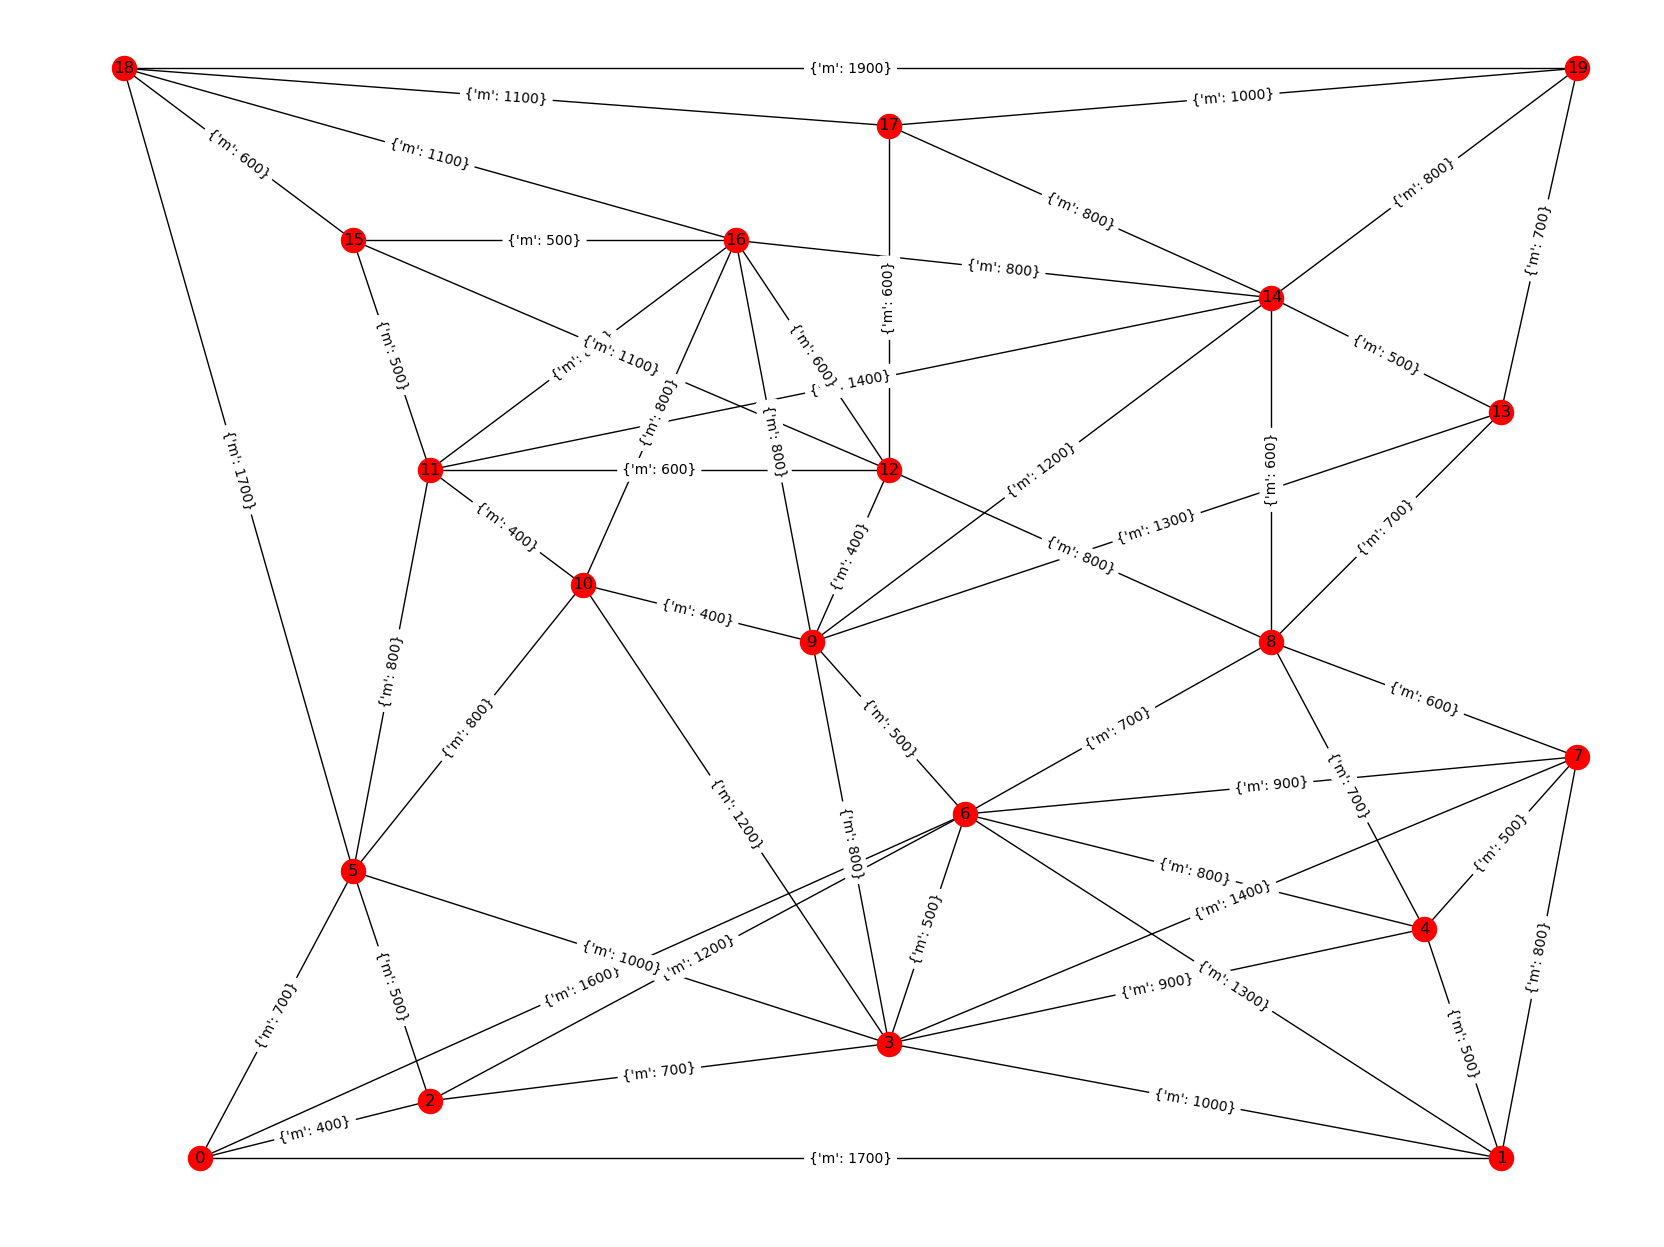

In [4]:
plt.figure(figsize=(16, 12), dpi=100)
nx.draw(G,posiciones)
nx.draw_networkx_labels(G,posiciones)
nx.draw_networkx_edge_labels(G,posiciones)
plt.show()

## 1.2 - DFS

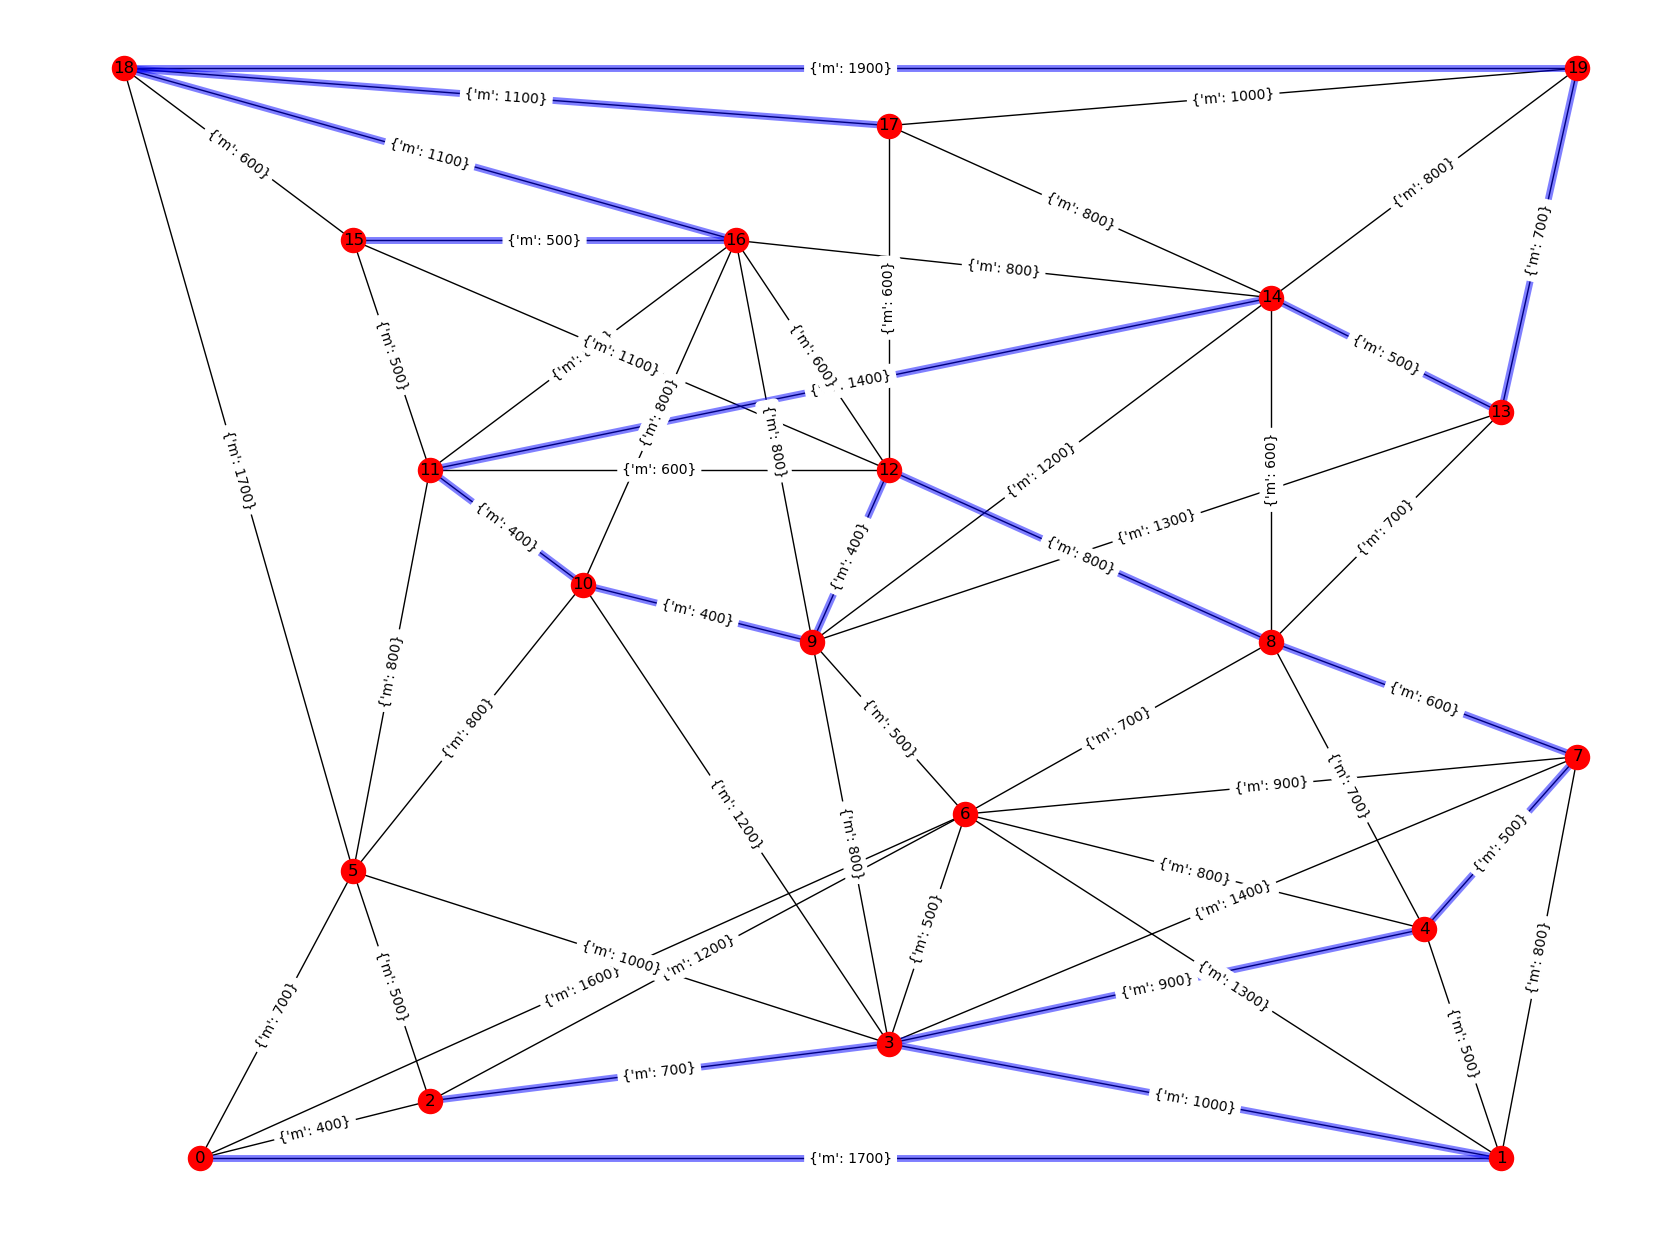

In [76]:
estado = array.array('i', range(1,20))
padre = array.array('i', range(1,20))
d = array.array('i', range(1,200))
f = array.array('i', range(1,200))

aristas = []

def DFSVisitar (u, tiempo):
    estado[u] = 1
    tiempo = tiempo+1
    d.insert(u, tiempo)
    for b in G:
        if G.has_edge(u,b) == True:
            if estado[b] == 0:
                aristas.append((u,b))
                padre[b] = u
                DFSVisitar(b, tiempo)
    estado[u] = -1
    tiempo = tiempo+1
    f[u] = tiempo

for u in G:
    estado.insert(u, 0) ### 0 para falso (no visitado), 1 para verdadero (visitado), -1 para terminado
    padre.insert(u, 0)  ### 0 nulo, 1 verdadero
tiempo = 0

for u in G:
    if estado[u] == 0:
        DFSVisitar(u, tiempo)
        
plt.figure(figsize=(16, 12), dpi=100)
nx.draw(G,posiciones)
nx.draw_networkx_labels(G,posiciones)
nx.draw_networkx_edges(G, posiciones, edgelist=aristas, width=5, alpha=0.5, edge_color='b')
nx.draw_networkx_edge_labels(G,posiciones)
plt.show()

# 2 - MST

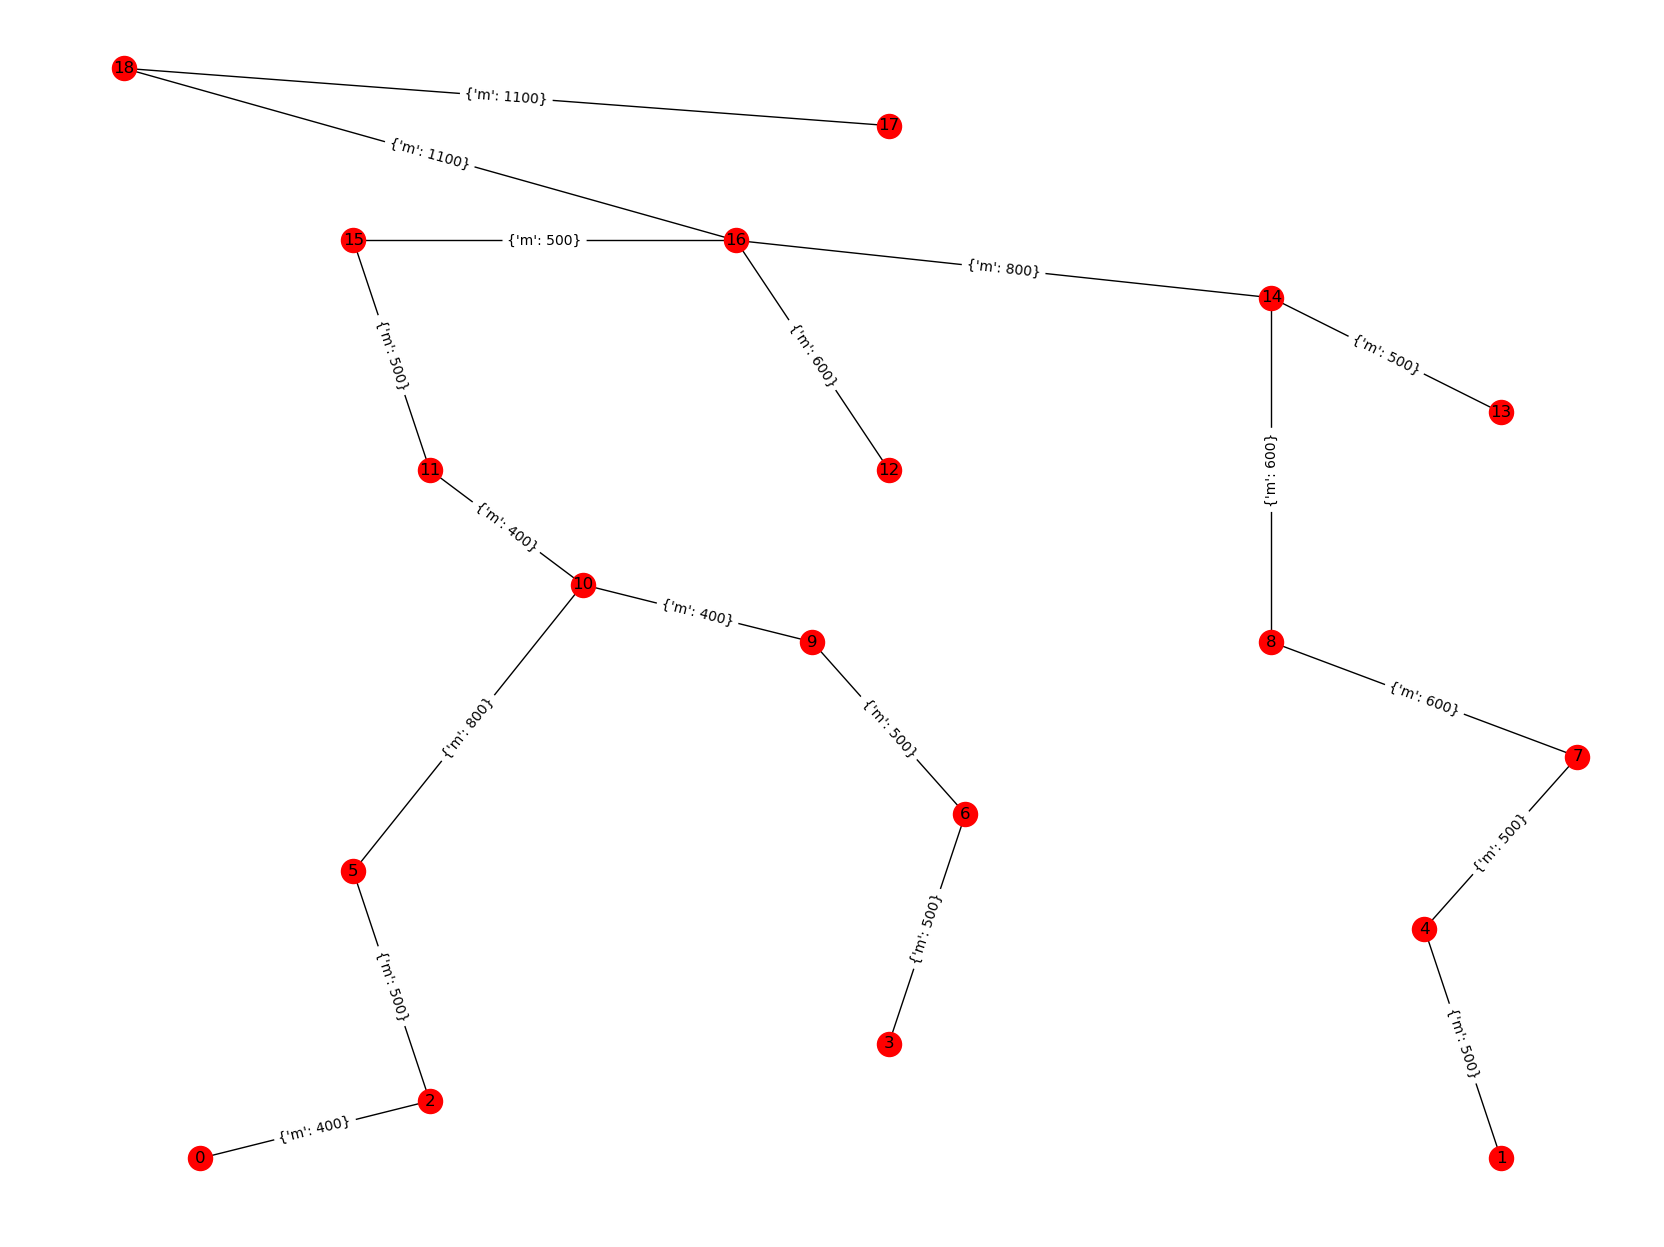

In [6]:
T=nx.Graph()
nodeinicial = 0
hecho = array.array('i', range(0,19))
for u in range(0,19):
    minimo = 99999999999999
    for b in range(0,19):
        if G.has_edge(u,b) == True:
            if b == nodeinicial:
                pass
            if hecho[b] == 1:
                pass
            else:
                t = G.get_edge_data(u, b)
                m=t["m"]
                if m < minimo:
                    minimo = m
                    nodefinal = b
                    nodeinicial = u
    hecho[nodeinicial] = 1
    t = G.get_edge_data(nodeinicial, nodefinal)
    m=t["m"]
    T.add_edge(nodeinicial,nodefinal,m=m)
    u = nodefinal
plt.figure(figsize=(16, 12), dpi=100)
nx.draw(T,posiciones)
nx.draw_networkx_labels(T,posiciones)
nx.draw_networkx_edge_labels(T,posiciones)
plt.show()

# 3 - Dijkstra

In [7]:
def Dijkstra(start,end=None):
    D = {} 
    P = {} 
    Q = priorityDictionary()
    Q[0] = 0
    
    for v in Q:
        D[v] = Q[v]
        if v == end: break
        for w in range(1,20):  
            if G.has_edge(v,w) == True:
                t = G.get_edge_data(v, w)
                m=t["m"]
                vwLength = D[v] + m
                if w in D:
                    if vwLength < D[w]:
                        raise ValueError
                elif w not in Q or vwLength < Q[w]:
                    Q[w] = vwLength
                    P[w] = v
    return (D,P)

def caminoCorto(end):
    start=0
    D,P = Dijkstra(0,end)
    Path = []
    while 1:
        Path.append(end)
        if end == start: break
        end = P[end]
    Path.reverse()
    return Path

[0, 6, 8, 13]


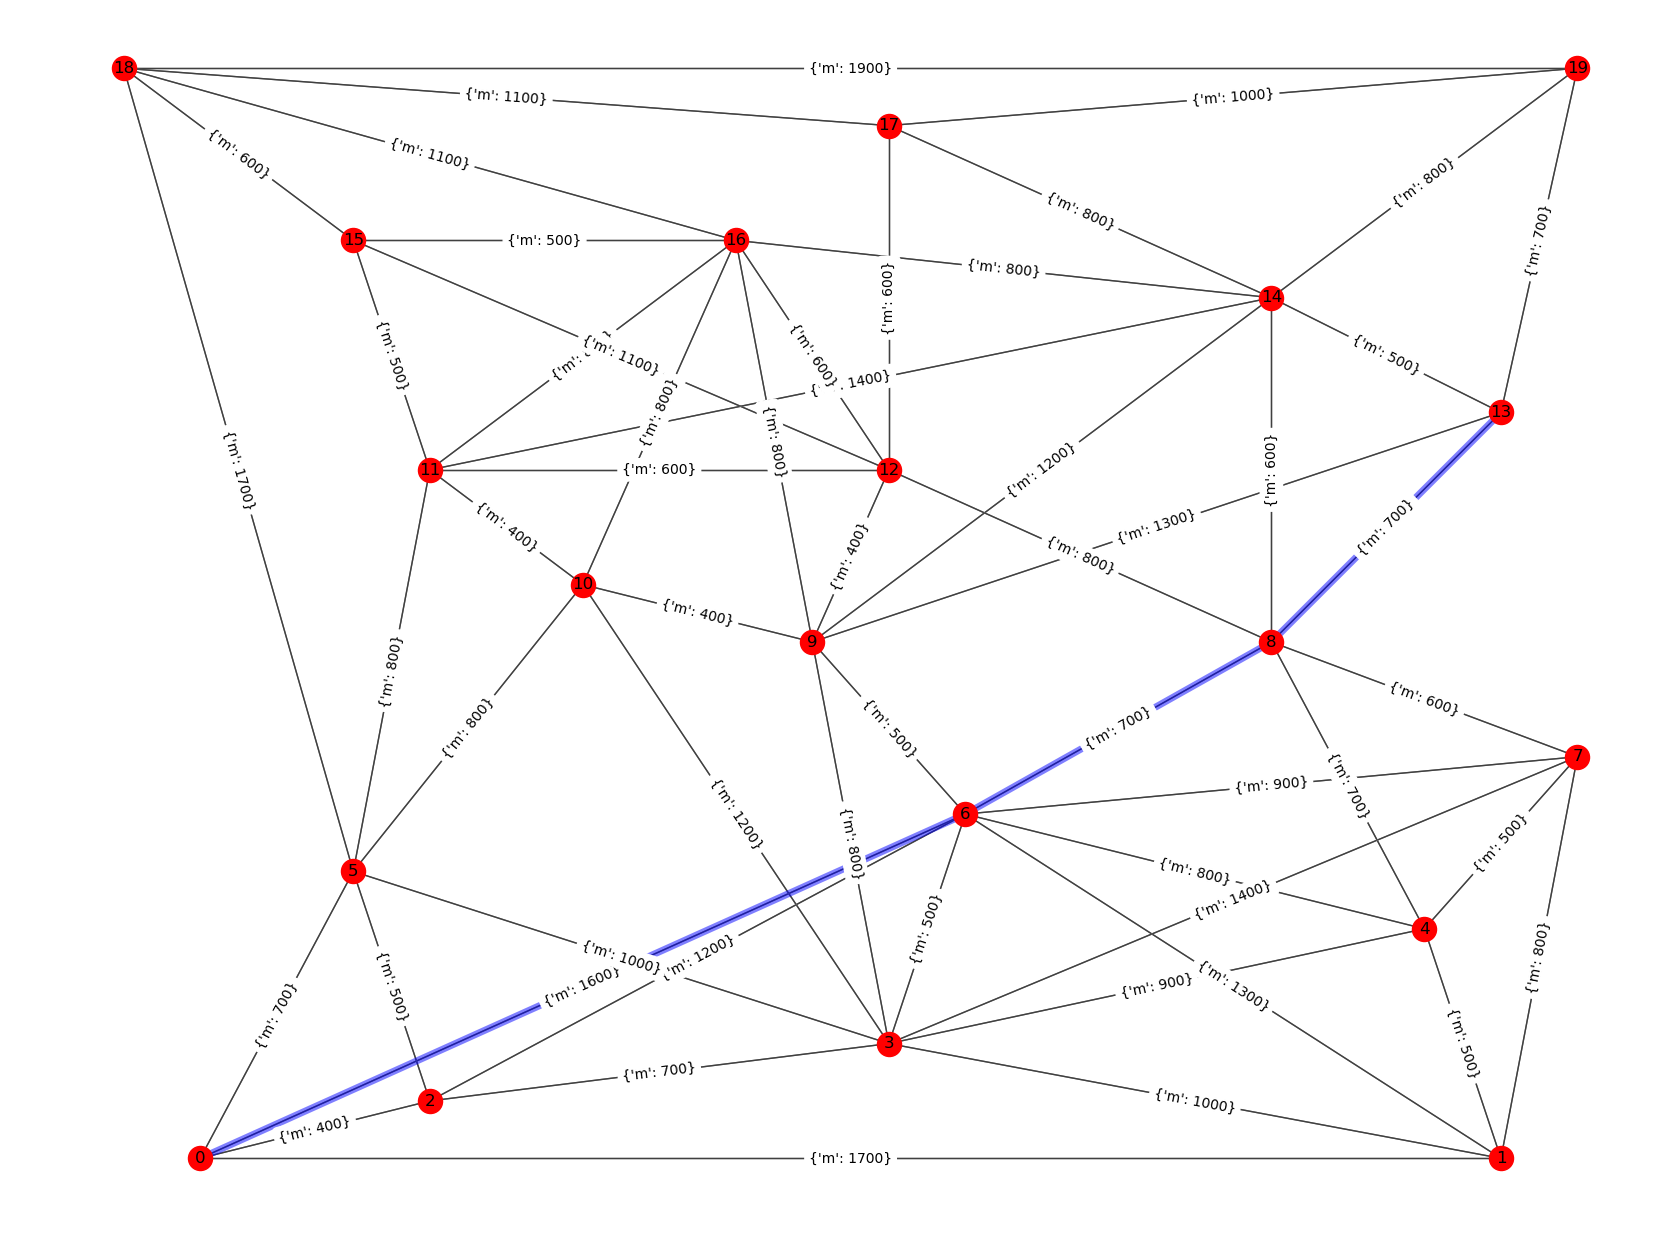

In [78]:
CORTOA = 13

camino = caminoCorto(CORTOA)
print(camino)
lencamino = len(camino)-1

aristas = []

for i in range(0,lencamino):
    aristas.append((camino[i],camino[i+1]))

plt.figure(figsize=(16, 12), dpi=100)
nx.draw(G,posiciones)
nx.draw_networkx_labels(G,posiciones)
nx.draw_networkx_edges(G, posiciones, alpha=0.5, edge_color='gray')
nx.draw_networkx_edges(G, posiciones, edgelist=aristas, width=5, alpha=0.5, edge_color='b')
nx.draw_networkx_edge_labels(G,posiciones)
plt.show()